In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

##### 1) Importing packages + importing the csv into a dataframe. 

In [2]:
import csv 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
main_data = pd.read_csv("FlightTime.csv")
main_data.head(2)

,Flight Time,Carrier,Flight Number,Origin,Destination,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Flight Time.1
0,11/1/2015,AA,111,ORD,LAX,1709.0,-1.0,1952.0,2.0,283
1,11/1/2015,AA,1092,ORD,LAX,2021.0,-4.0,2243.0,-20.0,262


In [3]:
# just taking a look at how the csv imported into the dataframe
main_data.head(1)

,Flight Time,Carrier,Flight Number,Origin,Destination,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Flight Time.1
0,11/1/2015,AA,111,ORD,LAX,1709.0,-1.0,1952.0,2.0,283


### destination = source.ix[start:end,['Column1','Column2'']]
#### [ ] around column names make sure to keep index on the destination dataframe
####  this returns the slice of the data frame of specific columns and length 

###### 2) Removing flight times that are below 230 min.

In [4]:
main_data = main_data[main_data['Flight Time.1'] > 230]
main_data.info() ## checking to see types/numbers of variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 741
Data columns (total 10 columns):
Flight Time        728 non-null object
Carrier            728 non-null object
Flight Number      728 non-null int64
Origin             728 non-null object
Destination        728 non-null object
Departure Time     728 non-null float64
Departure Delay    728 non-null float64
Arrival Time       728 non-null float64
Arrival Delay      728 non-null float64
Flight Time.1      728 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 62.6+ KB


##### 3) Below acts on dataFrame "main_data" - removes rows that have missing values for "Arrival Time" and "Departure Time" . Found from google search "How to drop rows of Pandas DataFrame whose value in certain columns is NaN"

In [5]:
main_data = main_data[pd.notnull(main_data['Arrival Time'])]
main_data = main_data[pd.notnull(main_data['Departure Time'])]

###### This tells me the length of my data set. The same information is shown above using "main_data.info()"

In [6]:
len(main_data) 

728

###### TFT = 0.117 ∗ d + .517*(L_ori − L_des) + 20
###### L_ori = longitude of the origin 
###### L_des = longitude of destination
###### d = spherical distance between L_ori and L_des
##### given in the problem --> | L_ori = -87.90 degrees |  L_des = -118.41 degree | d = 1741.16 |

In [7]:
lori = -87.90 
ldes = -118.41
d = 1741.16
tft = 0.117*d + .517*(lori-ldes) + 20
print ("The total flight time calculated is: ",tft, "Minutes")

The total flight time calculated is:  239.48939000000001 Minutes


In [8]:
dep_delay_mean = main_data['Departure Delay'].mean()
arr_delay_mean = main_data['Arrival Delay'].mean()


In [9]:
total_delay = dep_delay_mean + arr_delay_mean
tft_minutes = tft + total_delay
print ("The total delay calculated is: ",total_delay, "Minutes")

The total delay calculated is:  23.752747252747252 Minutes


In [10]:
### doing a rough view of what I should see. I would have done something like this if I didn't use "groupby()" below.
### this is also what I would have done if I just used the csv package.
carriers_test = main_data.groupby('Carrier')
for key,data in carriers_test:
    print (key)
    print (data['Departure Time'].mean())

AA
1435.661971830986
F9
2116.5862068965516
NK
1166.5762711864406
UA
1423.03355704698
VX
1194.7586206896551


In [11]:
# this sets the index to be "Carrier". Then I group which takes the unique values in the Index. 
# Then I take the mean of each column that corresponds to the unique values in the index.
carriers = main_data.set_index('Carrier').groupby(level = 0).mean()
carriers

,Flight Number,Departure Time,Departure Delay,Arrival Time,Arrival Delay,Flight Time.1
Carrier,,,,,,
AA,1526.408451,1435.661972,13.651408,1451.760563,3.260563,267.507042
F9,1271.000000,2116.586207,13.310345,1706.379310,23.275862,275.310345
NK,733.949153,1166.576271,17.084746,1375.152542,14.881356,267.559322
UA,807.526846,1423.033557,19.969799,1435.563758,11.194631,269.174497
VX,235.827586,1194.758621,5.965517,1434.465517,-1.568966,265.913793


In [12]:
extra_time_per_carrier = carriers['Flight Time.1'] - tft

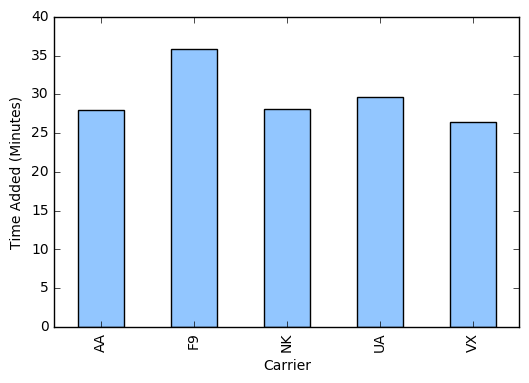

In [13]:
plt.style.use('seaborn-pastel')
extra_time_per_carrier.plot(kind = 'bar')
plt.ylabel('Time Added (Minutes)')
label_size = 10
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size

In [14]:
extra_time_per_carrier.to_csv('Case1_solution.csv', header = True)